In [237]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime, timedelta

%matplotlib inline


## Exercise 1.1
Open up a new Jupyter notebook

Download a few MTA turnstile data files

Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [192]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [193]:
turnstiles_df.columns = turnstiles_df.columns.str.strip()
# turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [194]:
turnstiles_df.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES', u'EXITS'],
      dtype='object')

In [195]:
turnstiles_df.DATE.value_counts().sort_index()

08/27/2016    27290
08/28/2016    27300
08/29/2016    27828
08/30/2016    27775
08/31/2016    27352
09/01/2016    28116
09/02/2016    27478
09/03/2016    27353
09/04/2016    27304
09/05/2016    27325
09/06/2016    28826
09/07/2016    27977
09/08/2016    28137
09/09/2016    27956
09/10/2016    27325
09/11/2016    27334
09/12/2016    28074
09/13/2016    27343
09/14/2016    27359
09/15/2016    27283
09/16/2016    28160
Name: DATE, dtype: int64

In [196]:
turnstiles_df['VALUES'] = turnstiles_df['C/A'] + "," + turnstiles_df['UNIT'] + "," + turnstiles_df['SCP'] + "," + turnstiles_df['STATION']
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,VALUES
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,"A002,R051,02-00-00,59 ST"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,"A002,R051,02-00-00,59 ST"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,"A002,R051,02-00-00,59 ST"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,"A002,R051,02-00-00,59 ST"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,"A002,R051,02-00-00,59 ST"


In [190]:
# turnstiles_df.drop('C/A',axis=1, inplace=True)
# turnstiles_df.drop('UNIT',axis=1, inplace=True)
# turnstiles_df.drop('SCP',axis=1, inplace=True)
# turnstiles_df.drop('STATION',axis=1, inplace=True)
# turnstiles_df.head()

In [191]:
# turnstiles_df = turnstiles_df.set_index('VALUES')

In [197]:
# Finding the Entry and Exit totals
entries = turnstiles_df['ENTRIES'] - turnstiles_df.groupby(['VALUES'])['ENTRIES'].shift(1)
exit = turnstiles_df['EXITS'] - turnstiles_df.groupby(['VALUES'])['EXITS'].shift(1)

turnstiles_df['TIMEFRAME_ENTRIES'] = entries
turnstiles_df['TIMEFRAME_EXITS'] = exit
# turnstiles_df = turnstiles_df.drop('ENTRIES', 1)
# turnstiles_df = turnstiles_df.drop('EXITS', 1)
turnstiles_df.dropna()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,VALUES,TIMEFRAME_ENTRIES,TIMEFRAME_EXITS
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,"A002,R051,02-00-00,59 ST",21.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,"A002,R051,02-00-00,59 ST",29.0,35.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,"A002,R051,02-00-00,59 ST",118.0,76.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,"A002,R051,02-00-00,59 ST",223.0,59.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,20:00:00,REGULAR,5800121,1966271,"A002,R051,02-00-00,59 ST",288.0,57.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,00:00:00,REGULAR,5800252,1966295,"A002,R051,02-00-00,59 ST",131.0,24.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,04:00:00,REGULAR,5800281,1966303,"A002,R051,02-00-00,59 ST",29.0,8.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,08:00:00,REGULAR,5800295,1966317,"A002,R051,02-00-00,59 ST",14.0,14.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,12:00:00,REGULAR,5800377,1966387,"A002,R051,02-00-00,59 ST",82.0,70.0
10,A002,R051,02-00-00,59 ST,NQR456,BMT,08/28/2016,16:00:00,REGULAR,5800572,1966460,"A002,R051,02-00-00,59 ST",195.0,73.0


In [198]:
# turnstiles_df['DATETIME'] = turnstiles_df.DATE[turnstiles_df.index] + ' ' + turnstiles_df.TIME[turnstiles_df.index]
# turnstiles_df.DATETIME = turnstiles_df.DATETIME.apply(dateutil.parser.parse)
# turnstiles_df.DATE = turnstiles_df.DATE.apply(dateutil.parser.parse)
# turnstiles_df.TIME = turnstiles_df.TIME.apply(dateutil.parser.parse)
# turnstiles_df.TIME = turnstiles_df.TIME.apply(lambda x: x.time())


# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [199]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,VALUES,TIMEFRAME_ENTRIES,TIMEFRAME_EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,"A002,R051,02-00-00,59 ST",NaN,NaN,2016-08-27 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,"A002,R051,02-00-00,59 ST",21.0,3.0,2016-08-27 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,"A002,R051,02-00-00,59 ST",29.0,35.0,2016-08-27 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,"A002,R051,02-00-00,59 ST",118.0,76.0,2016-08-27 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,"A002,R051,02-00-00,59 ST",223.0,59.0,2016-08-27 16:00:00


In [200]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()

In [201]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5799442
1,A002,R051,02-00-00,59 ST,08/28/2016,5800252
2,A002,R051,02-00-00,59 ST,08/29/2016,5800934
3,A002,R051,02-00-00,59 ST,08/30/2016,5802514
4,A002,R051,02-00-00,59 ST,08/31/2016,5804071


In [202]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [203]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/27/2016,5799442,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/28/2016,5800252,08/27/2016,5799442.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5800934,08/28/2016,5800252.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5802514,08/29/2016,5800934.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5804071,08/30/2016,5802514.0


In [204]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [210]:

# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 8, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,VALUES,TIMEFRAME_ENTRIES,TIMEFRAME_EXITS,DATE_TIME
1441,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,00:00:00,REGULAR,887690958,493420995,"A011,R080,01-00-00,57 ST-7 AV",NaN,NaN,2016-08-27 00:00:00
1442,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,04:00:00,REGULAR,887690800,493420936,"A011,R080,01-00-00,57 ST-7 AV",-158.0,-59.0,2016-08-27 04:00:00
1443,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,08:00:00,REGULAR,887690738,493420679,"A011,R080,01-00-00,57 ST-7 AV",-62.0,-257.0,2016-08-27 08:00:00
1444,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,12:00:00,REGULAR,887690472,493420159,"A011,R080,01-00-00,57 ST-7 AV",-266.0,-520.0,2016-08-27 12:00:00
1445,A011,R080,01-00-00,57 ST-7 AV,NQR,BMT,08/27/2016,16:00:00,REGULAR,887690085,493419616,"A011,R080,01-00-00,57 ST-7 AV",-387.0,-543.0,2016-08-27 16:00:00


In [212]:
# (turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
#     .groupby(["VALUES"])
#      .size())

In [213]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

(481, 1894869428.0)
(262196, 67111299.0)
(63, 1054476.0)
(3008, 2044805.0)
(374, 1494569141.0)
(2763, 14129688.0)
(67108864, 0.0)
(335599567, 1373904.0)
(36, 3252402.0)
(1173, 3665616.0)
(262269, 10823938.0)
(1475, 1460416.0)
(1154413428, 8957775.0)
(100663296, 35655801.0)
(1867, 1014611.0)
(186916225, 604712473.0)
(1064, 6131096.0)
(694, 11078609.0)
(1315, 74672293.0)
(0, 117440532.0)
(100663296, 1299.0)
(117440514, 100663296.0)
(2157, 9170515.0)
(501, 2336276.0)
(1024, 12498870.0)


In [214]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/28/2016,5800252,08/27/2016,5799442.0,810.0
2,A002,R051,02-00-00,59 ST,08/29/2016,5800934,08/28/2016,5800252.0,682.0
3,A002,R051,02-00-00,59 ST,08/30/2016,5802514,08/29/2016,5800934.0,1580.0
4,A002,R051,02-00-00,59 ST,08/31/2016,5804071,08/30/2016,5802514.0,1557.0
5,A002,R051,02-00-00,59 ST,09/01/2016,5805638,08/31/2016,5804071.0,1567.0


## Exercise 1.4

In [218]:
turnstiles_daily["DATEADJ"] = pd.to_datetime(turnstiles_daily.DATE, format = "%m/%d/%Y")

In [219]:
plt.figure(figsize=(10,3))

mask = ((turnstiles_daily["C/A"] == "A002") & 
        (turnstiles_daily["UNIT"] == "R051") & 
        (turnstiles_daily["SCP"] == "02-00-00") & 
        (turnstiles_daily["STATION"] == "59 ST"))

selected_turnstile = turnstiles_daily[(mask)]

In [220]:
selected_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATEADJ
1,A002,R051,02-00-00,59 ST,08/28/2016,5800252,08/27/2016,5799442.0,810.0,2016-08-28
2,A002,R051,02-00-00,59 ST,08/29/2016,5800934,08/28/2016,5800252.0,682.0,2016-08-29
3,A002,R051,02-00-00,59 ST,08/30/2016,5802514,08/29/2016,5800934.0,1580.0,2016-08-30
4,A002,R051,02-00-00,59 ST,08/31/2016,5804071,08/30/2016,5802514.0,1557.0,2016-08-31
5,A002,R051,02-00-00,59 ST,09/01/2016,5805638,08/31/2016,5804071.0,1567.0,2016-09-01


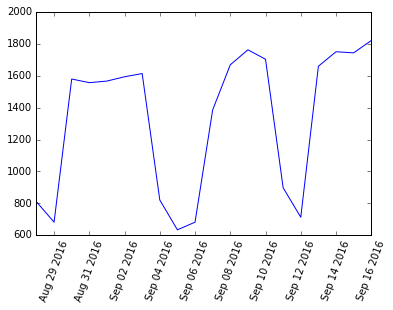

In [221]:

dates = selected_turnstile["DATEADJ"]
counts = selected_turnstile["DAILY_ENTRIES"]

plt.xticks(rotation=70)
plt.plot(dates, counts)

## Exercise 1.5 

Find Control Area / Unit / Station, for each day

In [225]:
turnstile_control_unit_station = (turnstiles_daily
                   .groupby(['C/A', 'UNIT', 'STATION','DATEADJ'])
                   .DAILY_ENTRIES
                   .sum()
                   .reset_index()
                   )

In [226]:
turnstile_control_unit_station.head()

,C/A,UNIT,STATION,DATEADJ,DAILY_ENTRIES
0,A002,R051,59 ST,2016-08-28,9302.0
1,A002,R051,59 ST,2016-08-29,7674.0
2,A002,R051,59 ST,2016-08-30,16086.0
3,A002,R051,59 ST,2016-08-31,16703.0
4,A002,R051,59 ST,2016-09-01,16620.0


In [227]:
turnstile_stations = (turnstile_control_unit_station.groupby(['STATION', 'DATEADJ']).DAILY_ENTRIES.sum().reset_index())

In [229]:
turnstile_stations.head()

,STATION,DATEADJ,DAILY_ENTRIES
0,1 AV,2016-08-28,15954.0
1,1 AV,2016-08-29,13109.0
2,1 AV,2016-08-30,18582.0
3,1 AV,2016-08-31,19685.0
4,1 AV,2016-09-01,19748.0


## Exercise 1.6

TimeSeres for each station

In [233]:
mask = ((turnstile_stations['STATION'] == "1 AV"))

turnstile_1_AV = turnstile_stations[mask]

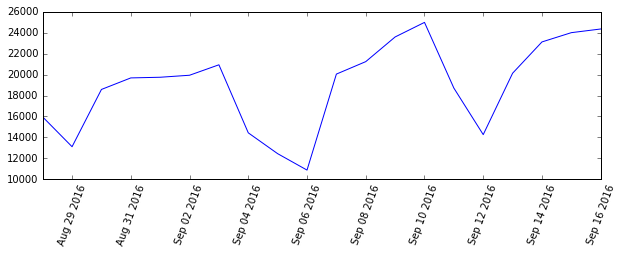

In [234]:
plt.figure(figsize=(10,3))

dates = turnstile_1_AV["DATEADJ"]
counts = turnstile_1_AV["DAILY_ENTRIES"]

plt.xticks(rotation=70)
plt.plot(dates, counts)

## 1.8 

Days in week

In [239]:
#Adding day and month
turnstile_1_AV['DAY'] = turnstile_1_AV['DATEADJ'].dt.weekday

/Users/williamsanders/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [240]:
turnstile_1_AV

,STATION,DATEADJ,DAILY_ENTRIES,DAY
0,1 AV,2016-08-28,15954.0,6
1,1 AV,2016-08-29,13109.0,0
2,1 AV,2016-08-30,18582.0,1
3,1 AV,2016-08-31,19685.0,2
4,1 AV,2016-09-01,19748.0,3
5,1 AV,2016-09-02,19940.0,4
6,1 AV,2016-09-03,20938.0,5
7,1 AV,2016-09-04,14435.0,6
8,1 AV,2016-09-05,12444.0,0
9,1 AV,2016-09-06,10875.0,1


In [245]:
turnstile_1_AV_week1 = turnstile_1_AV[((turnstile_1_AV.DATEADJ >= "2016-08-28") & (turnstile_1_AV.DATEADJ <= "2016-09-03"))]
turnstile_1_AV_week2 = turnstile_1_AV[((turnstile_1_AV.DATEADJ >= "2016-09-04") & (turnstile_1_AV.DATEADJ <= "2016-09-10"))]
turnstile_1_AV_week3 = turnstile_1_AV[((turnstile_1_AV.DATEADJ >= "2016-09-11") & (turnstile_1_AV.DATEADJ <= "2016-09-16"))]
len(turnstile_1_AV_week1)


7

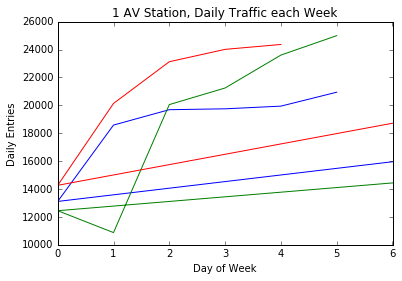

In [244]:
plt.plot(turnstile_1_AV_week1["DAY"], turnstile_1_AV_week1["DAILY_ENTRIES"])
plt.plot(turnstile_1_AV_week2["DAY"], turnstile_1_AV_week2["DAILY_ENTRIES"])
plt.plot(turnstile_1_AV_week3["DAY"], turnstile_1_AV_week3["DAILY_ENTRIES"])


plt.title('1 AV Station, Daily Traffic each Week')
plt.xlabel('Day of Week')
plt.ylabel('Daily Entries')

## Exercise 1.9 Top Stations

In [246]:
top_stations = turnstiles_daily.groupby(['STATION']).sum().sort_values(by='DAILY_ENTRIES', ascending = False)

In [247]:
top_stations.head()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
STATION,,,
34 ST-PENN STA,49859558449,4.985677e+10,2783650.0
GRD CNTRL-42 ST,64658834237,6.465646e+10,2382474.0
34 ST-HERALD SQ,64626284839,6.462441e+10,2012447.0
23 ST,130383664426,1.303818e+11,1984762.0
CANAL ST,119520328300,1.195220e+11,1918653.0


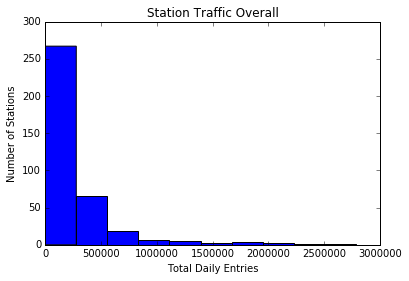

In [250]:
plt.hist(top_stations['DAILY_ENTRIES'])
plt.title('Station Traffic Overall')
plt.xlabel('Total Daily Entries')
plt.ylabel('Number of Stations');